# Can you predict the strength of concrete?

## 📖 Background
You work in the civil engineering department of a major university. You are part of a project testing the strength of concrete samples. 

Concrete is the most widely used building material in the world. It is a mix of cement and water with gravel and sand. It can also include other materials like fly ash, blast furnace slag, and additives. 

The compressive strength of concrete is a function of components and age, so your team is testing different combinations of ingredients at different time intervals. 

The project leader asked you to find a simple way to estimate strength so that students can predict how a particular sample is expected to perform.

## 💾 The data
The team has already tested more than a thousand samples ([source](https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength)):

#### Compressive strength data:
- "cement" - Portland cement in kg/m3
- "slag" - Blast furnace slag in kg/m3
- "fly_ash" - Fly ash in kg/m3
- "water" - Water in liters/m3
- "superplasticizer" - Superplasticizer additive in kg/m3
- "coarse_aggregate" - Coarse aggregate (gravel) in kg/m3
- "fine_aggregate" - Fine aggregate (sand) in kg/m3
- "age" - Age of the sample in days
- "strength" - Concrete compressive strength in megapascals (MPa)

***Acknowledgments**: I-Cheng Yeh, "Modeling of strength of high-performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998)*.

**Reading Data into Python

Prepping data to be reviewed and understood to extract information.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
CompressiveStrengthData = pd.read_csv(r'C:\Users\bchad\OneDrive\Data Analytics\Analytics Portfolio\Python Concrete Project/concrete_data.csv')
CompressiveStrengthData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   fly_ash           1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarse_aggregate  1030 non-null   float64
 6   fine_aggregate    1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [10]:
# preview of rows and columns in the data
CompressiveStrengthData.head()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [11]:
CompressiveStrengthData.isnull().sum()

cement              0
slag                0
fly_ash             0
water               0
superplasticizer    0
coarse_aggregate    0
fine_aggregate      0
age                 0
strength            0
dtype: int64

There are no nulls/missing values present in the data.

<AxesSubplot:>

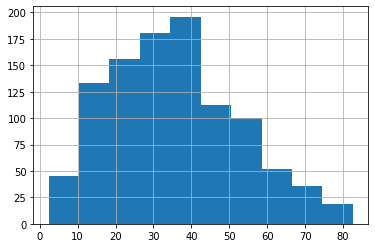

In [12]:
#Created Histogram to review distribution of the strength variable.
CompressiveStrengthData['strength'].hist()

The distribution of the target variable is slightly skewed to the left, but does have a sufficient number of rows for each value. Since the target variable is only slightly skewed left, we can move forward. 

In [13]:
#Pulling descriptive statistical details of the data
CompressiveStrengthData.describe(include = 'all')

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [14]:
#Pulling unique values for each column
CompressiveStrengthData.nunique()

cement              278
slag                185
fly_ash             156
water               195
superplasticizer    111
coarse_aggregate    284
fine_aggregate      302
age                  14
strength            845
dtype: int64

**Calculate Average Strength Based on Age

Running the mean function to pull the average strength number and grouping them by the age. 

In [15]:
mean_strength = CompressiveStrengthData.groupby(by='age')['strength'].mean()
df = pd.DataFrame(mean_strength)
print(mean_strength)

age
1       9.455000
3      18.981194
7      26.050873
14     28.750968
28     36.748612
56     51.890220
90     40.480370
91     69.808636
100    47.668846
120    39.646667
180    41.730385
270    51.272308
360    40.696667
365    43.557857
Name: strength, dtype: float64


**Average Concrete Strength (Days 1, 7, 14, 28)

Now that I have the above data for mean strengths based on age, extracting the stakeholders requested average strength based on days 1, 7, 14, and 28.

In [16]:
#Sorting mean strength based on requested ages
df.loc(axis=0)[1,7,14,28]

,strength
age,
1,9.455000
7,26.050873
14,28.750968
28,36.748612


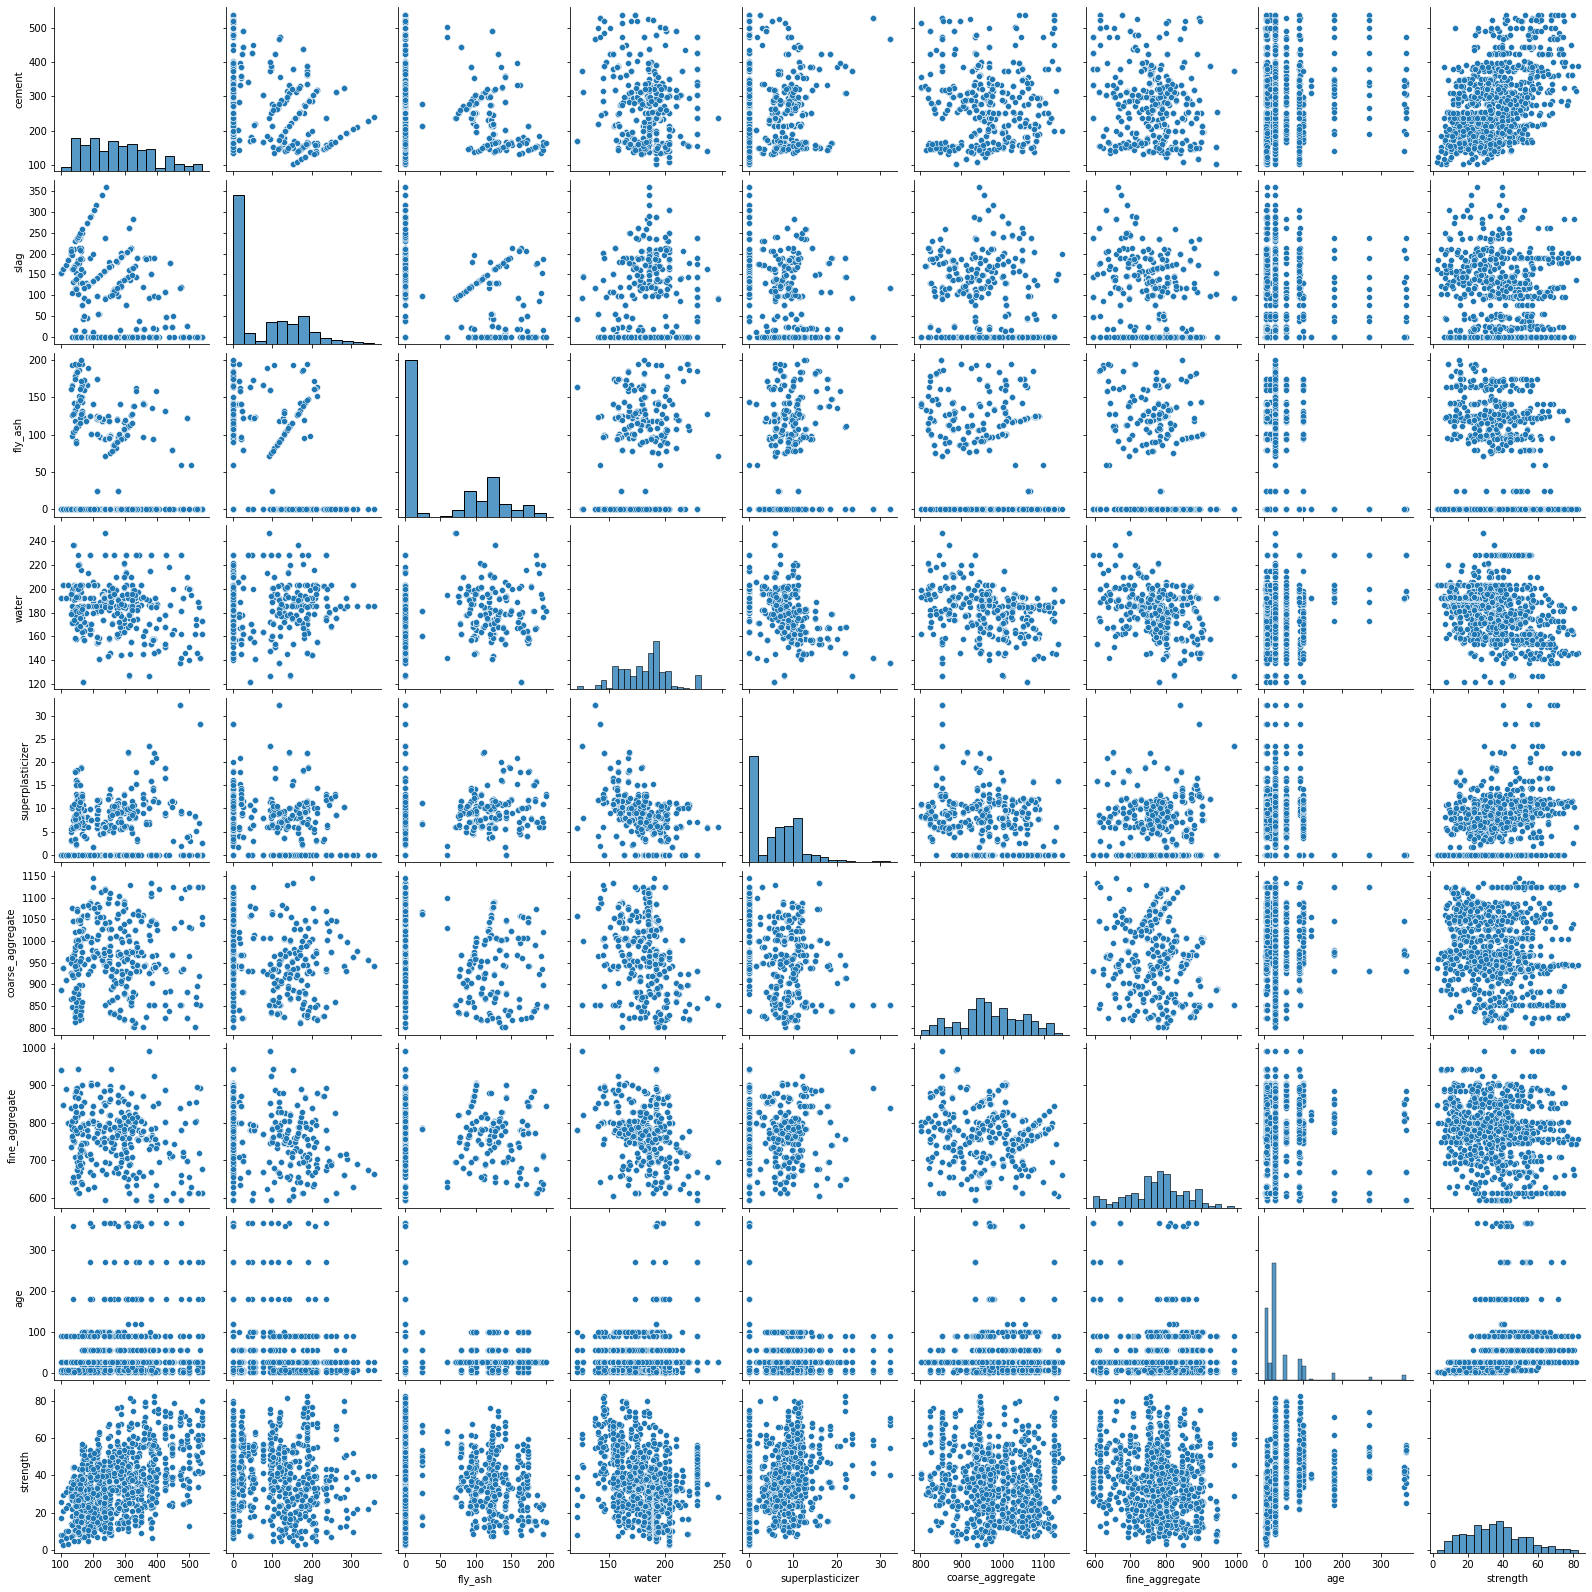

In [17]:
#Plotting multiple columns together
sb.pairplot(CompressiveStrengthData)

This allows me to quickly plot out the general correlation for all variables compared to each within the data set. This creats a grid of axis where the y-axis belongs to the row and the x-axis belongs to columns. 

Text(0.5, 0, 'cement')

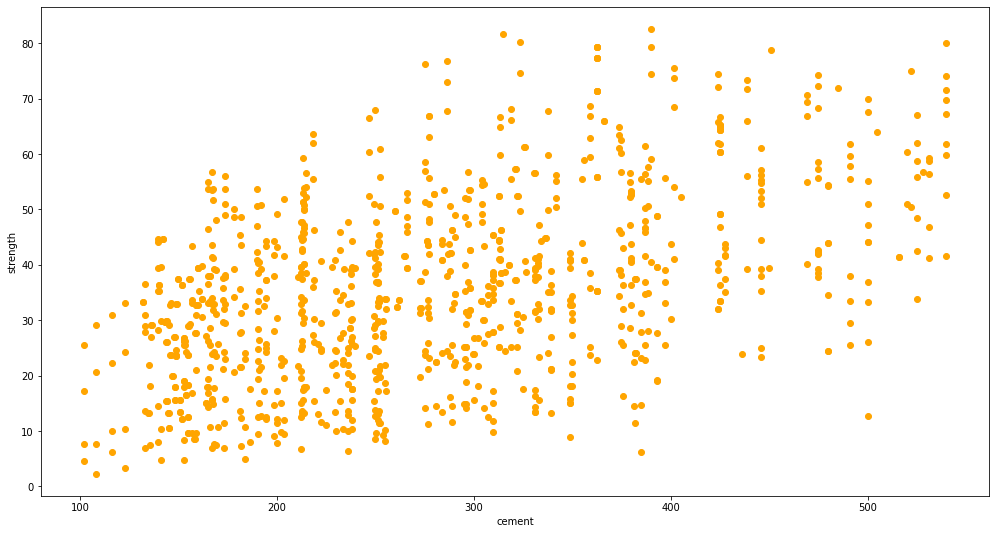

In [18]:
# scatter plot of Strength and Cement
plt.figure(figsize=[17,9])
plt.scatter(y='strength',x='cement',color = 'orange',data= CompressiveStrengthData)
plt.ylabel('strength')
plt.xlabel('cement')

Looking at this data, it confirms that the amount of cement used will also increase the strength of the cement as a whole. 

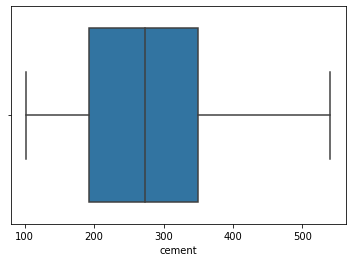

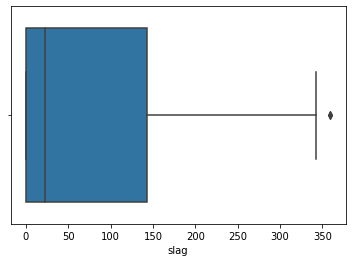

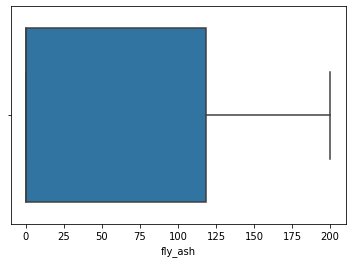

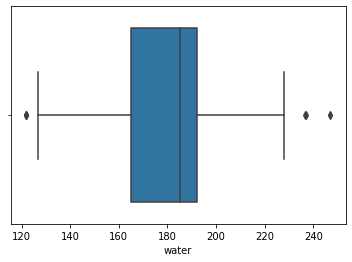

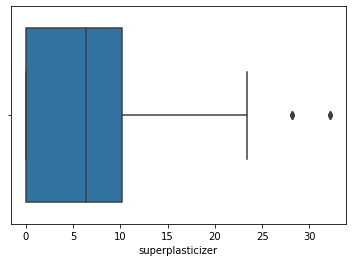

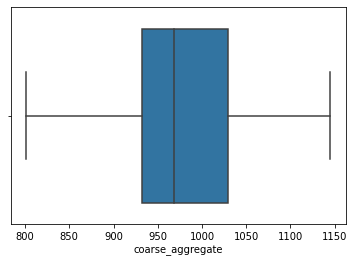

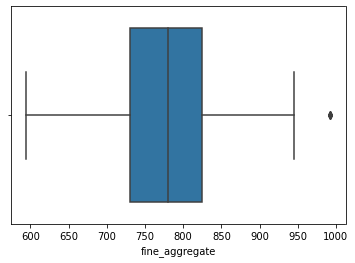

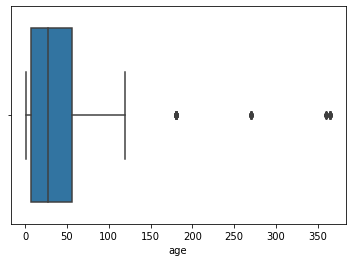

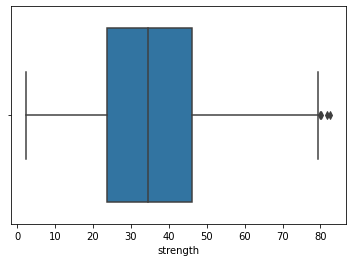

In [19]:
c= ['cement','slag','fly_ash','water','superplasticizer','coarse_aggregate','fine_aggregate','age','strength']
for i in c:
    sb.boxplot(x=CompressiveStrengthData[i])
    plt.show()

It does seem as though there are a few outliers, specifically in the strength, age, fine_aggregate, superplasticizer, water and slag. I will keep  outliers for the target variable (Strength) in the data for this model.

In [20]:
New_strength = CompressiveStrengthData
New_strength.sort_values(i, ascending = False)

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
181,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.60
381,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75
153,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
159,389.9,189.0,0.0,145.9,22.0,944.7,755.8,56,79.40
...,...,...,...,...,...,...,...,...,...
717,141.3,212.0,0.0,203.5,0.0,971.8,748.5,3,4.83
668,153.0,102.0,0.0,192.0,0.0,888.0,943.1,3,4.78
652,102.0,153.0,0.0,192.0,0.0,887.0,942.0,3,4.57
705,122.6,183.9,0.0,203.5,0.0,958.2,800.1,3,3.32


**Plotting Correlation

Creating heatmap for correlation coefficients between both independent and the dependent variables. 

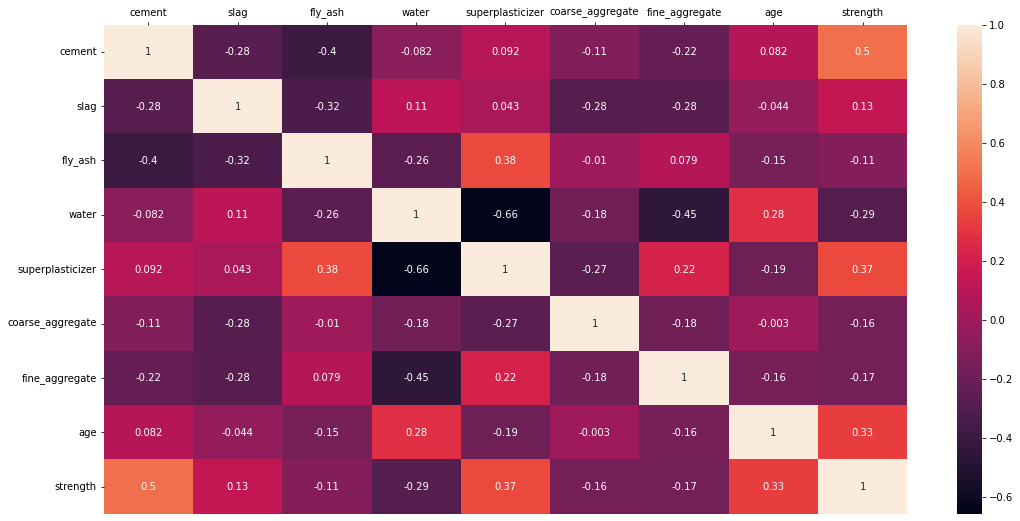

In [21]:
plt.figure(figsize=[18,9])

#ploting correlation plot

g = sb.heatmap(CompressiveStrengthData.corr(),annot=True)
g.xaxis.set_ticks_position("top")

Utilizing the heatmap here, I can see that there is a stronger negative correlation between strength and water, which would indicate that the more water used, the less compressive strength the cement can support and vice versa. Also, the amount of cement, superplasticizer and age have a positive correlation to increasing the compressive strength of the cement as well.

In [22]:
# independent variables
Predictors = CompressiveStrengthData.drop(['strength'],axis=1)
# dependent variable
Target = CompressiveStrengthData['strength']


In this, x contains the list of independent variables for the prediction while y will contain the dependent variable (strength) we are looking to research.

	Independent Variables = cement, fly_ash, water, superplasticizer, coasese_aggregate, fine_aggregate, age
    
    Dependent Variable = strength

Utilizing scikit-learn module, train_test_split for splitting the training and testing parts.

In [23]:
# importing train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(Predictors,Target,test_size=0.3,random_state=42)

**Data Scaling

This is done to balance the data points

In [24]:
from sklearn.preprocessing import MinMaxScaler
MinMax = MinMaxScaler()
Fit = MinMax.fit(xtrain)
xtrain_scl = Fit.transform(xtrain)
xtest_scl = Fit.transform(xtest)

Created MinMaxScaler() class object. After creating the object I fit train data into MinMaxScaler for scaling the data and then I transformed the train and test data into an array.

**Fitting predicted data points to originals

Running prediction scores of regresssion algorithms and plotting them via scatter plot to the original data points. 

In [25]:
# import linear regression models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
fit=lr.fit(xtrain_scl,ytrain)
score = lr.score(xtest_scl,ytest)
print('predicted score is : {}'.format(score))
print('..................................')
y_predict = lr.predict(xtest_scl)
print('mean_sqrd_error is ==',mean_squared_error(ytest,y_predict))
rms = np.sqrt(mean_squared_error(ytest,y_predict)) 
print('root mean squared error is == {}'.format(rms))

predicted score is : 0.5943782479239215
..................................
mean_sqrd_error is == 109.75080797014375
root mean squared error is == 10.476201982118507


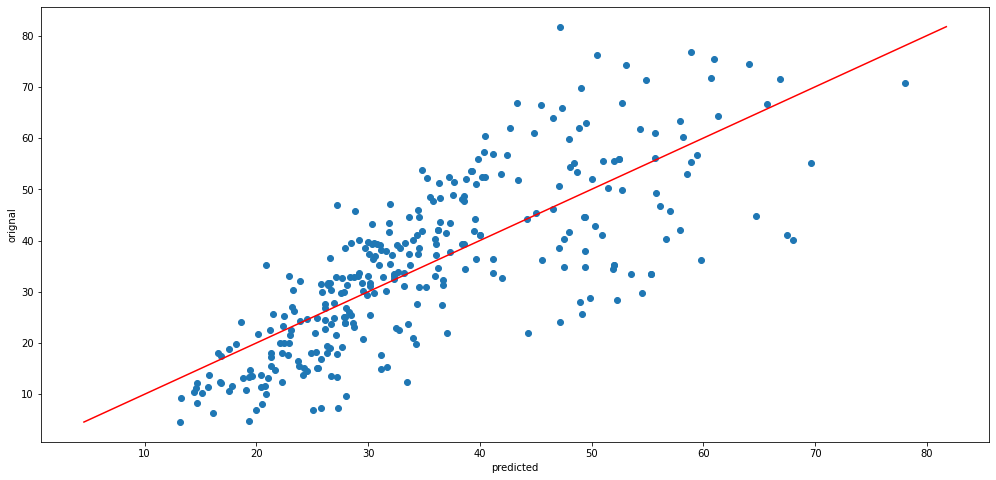

In [26]:
plt.figure(figsize=[17,8])
plt.scatter(y_predict,ytest)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

In [27]:
#import ridge and lasso regresion
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error
rd= Ridge(alpha=0.4)
ls= Lasso(alpha=0.3)
fit_rd=rd.fit(xtrain_scl,ytrain)
fit_ls = ls.fit(xtrain_scl,ytrain)
print('score od ridge regression is:',rd.score(xtest_scl,ytest))
print('.......................................................')
print('score of lasso is:-',ls.score(xtest_scl,ytest))
print('mean_sqrd_error of ridge is==',mean_squared_error(ytest,rd.predict(xtest_scl)))
print('mean_sqrd_error of lasso is==',mean_squared_error(ytest,ls.predict(xtest_scl)))
print('root_mean_sqrd error of ridge is==',np.sqrt(mean_squared_error(ytest,rd.predict(xtest_scl))))
print('root_mean_sqrd error of lasso is==',np.sqrt(mean_squared_error(ytest,lr.predict(xtest_scl))))

score od ridge regression is: 0.5966697585099402
.......................................................
score of lasso is:- 0.5115644821543361
mean_sqrd_error of ridge is== 109.13078417457444
mean_sqrd_error of lasso is== 132.1580818841855
root_mean_sqrd error of ridge is== 10.446568057241308
root_mean_sqrd error of lasso is== 10.476201982118507


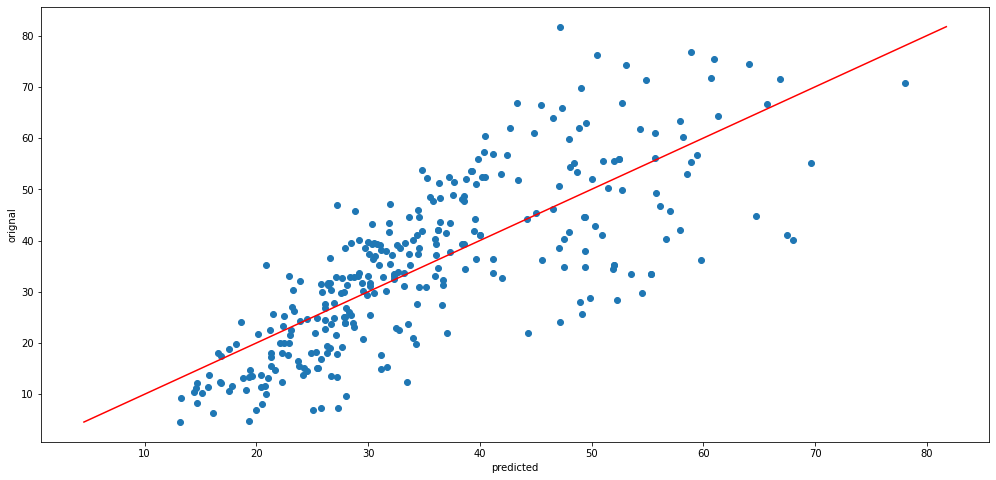

In [28]:
plt.figure(figsize=[17,8])
plt.scatter(y_predict,ytest)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

In [29]:
# import Huber regression models
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error
hr1=HuberRegressor()
fit=hr1.fit(xtrain_scl,ytrain)
score = hr1.score(xtest_scl,ytest)
print('predicted score is : {}'.format(score))
print('..................................')
y_predict = hr1.predict(xtest_scl)
print('mean_sqrd_error is ==',mean_squared_error(ytest,y_predict))
rms = np.sqrt(mean_squared_error(ytest,y_predict)) 
print('root mean squared error is == {}'.format(rms))

predicted score is : 0.5753840809131869
..................................
mean_sqrd_error is == 114.89014077337318
root mean squared error is == 10.718681858016552


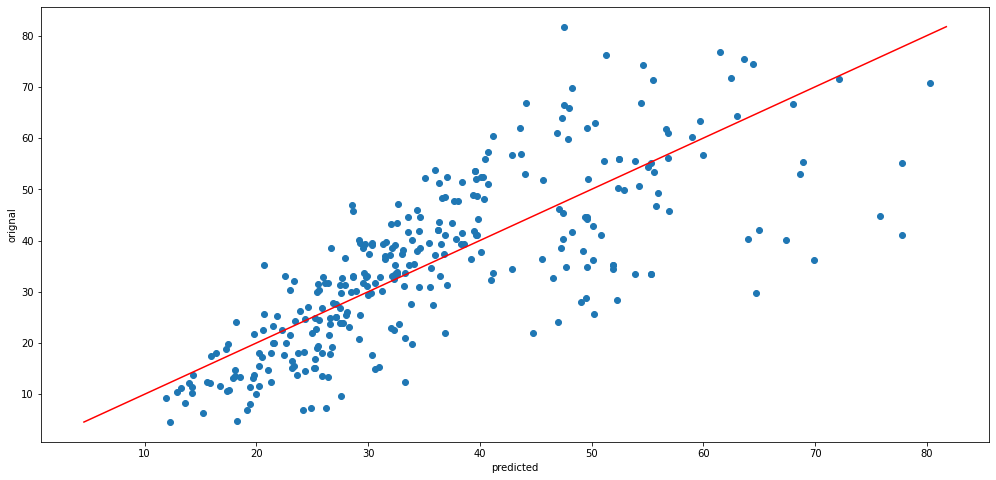

In [30]:
plt.figure(figsize=[17,8])
plt.scatter(y_predict,ytest)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

In [31]:
# import random forest regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rnd= RandomForestRegressor(ccp_alpha=0.0)
fit_rnd= rnd.fit(xtrain_scl,ytrain)
print('score is:',rnd.score(xtest_scl,ytest))
print('........................................')
print('mean_sqrd_error is==',mean_squared_error(ytest,rnd.predict(xtest_scl)))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(ytest,rnd.predict(xtest_scl))))

score is: 0.884844645945564
........................................
mean_sqrd_error is== 31.158075435737146
root_mean_squared error of is== 5.5819419054426875


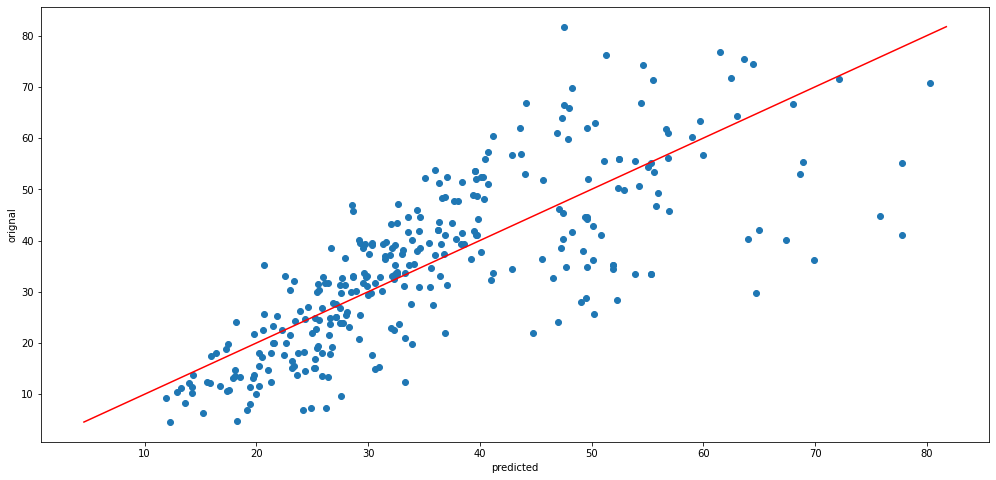

In [32]:
plt.figure(figsize=[17,8])
plt.scatter(y_predict,ytest)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

The accuracy of the RandomForestRegressor was the highest out of linear, lasso, ridge, and huber regression. RandomForestRegressor model will be used as it should provide a lessor error rate. 

**Predicted Values vs Original Values

Taking compressive strength between predicted values and original values.

In [33]:
x_predict = list(rnd.predict(xtest))
predicted_df = {'predicted_values': x_predict, 'original_values': ytest}
#creating new dataframe
pd.DataFrame(predicted_df).head(10)

c:\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,predicted_values,original_values
31,55.9905,52.91
109,61.3657,55.90
136,61.3657,74.50
88,61.3657,35.30
918,52.1153,10.54
1025,60.9700,44.28
870,60.9700,23.69
318,52.1153,45.37
261,52.1153,37.40
535,50.1328,48.85


Although, most of the regression models are similar the RandomForestRegrossor gives values that are similar to the original values provided. This model will be best for providing to stakeholders on the predictive strength of concrete based on the datas findings. 

If you have made it to the end of this project, I would like to thank you for your time and consideration. Please feel free to connect with me on LinkedIn: [Chad Brooks](https://www.linkedin.com/in/chad-brooks51/)